In [1]:
import pandas as pd

In [2]:
tmdb = pd.read_csv('tmdb_5000_movies.csv')
tmdb.head()

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124


In [3]:
tmdb.describe()

,budget,id,popularity,revenue,runtime,vote_average,vote_count
count,4.803000e+03,4803.000000,4803.000000,4.803000e+03,4801.000000,4803.000000,4803.000000
mean,2.904504e+07,57165.484281,21.492301,8.226064e+07,106.875859,6.092172,690.217989
std,4.072239e+07,88694.614033,31.816650,1.628571e+08,22.611935,1.194612,1234.585891
min,0.000000e+00,5.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000
25%,7.900000e+05,9014.500000,4.668070,0.000000e+00,94.000000,5.600000,54.000000
50%,1.500000e+07,14629.000000,12.921594,1.917000e+07,103.000000,6.200000,235.000000
75%,4.000000e+07,58610.500000,28.313505,9.291719e+07,118.000000,6.800000,737.000000
max,3.800000e+08,459488.000000,875.581305,2.787965e+09,338.000000,10.000000,13752.000000


In [4]:
import seaborn as sns

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


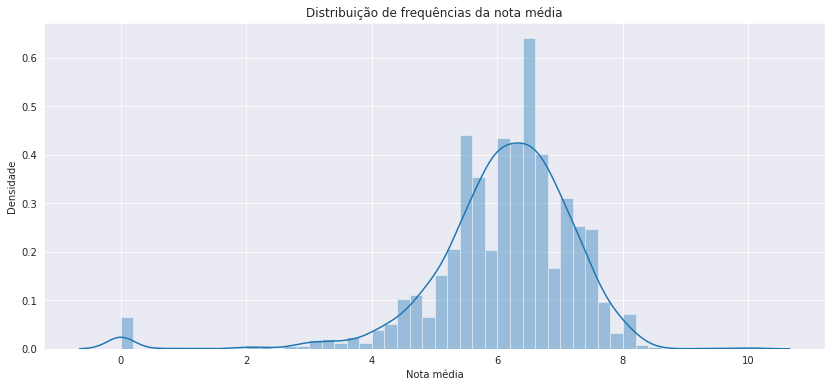

In [5]:
sns.set_style('darkgrid')
ax = sns.distplot(tmdb.vote_average)
ax.set(xlabel='Nota média',ylabel='Densidade',title = 'Distribuição de frequências da nota média')
ax.figure.set_size_inches(14,6)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


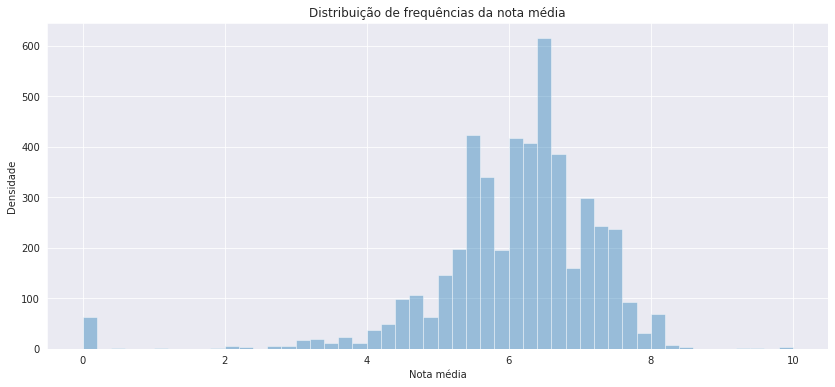

In [6]:
sns.set_style('darkgrid')
ax = sns.distplot(tmdb.vote_average,kde=False)
ax.set(xlabel='Nota média',ylabel='Densidade',title = 'Distribuição de frequências da nota média')
ax.figure.set_size_inches(14,6)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


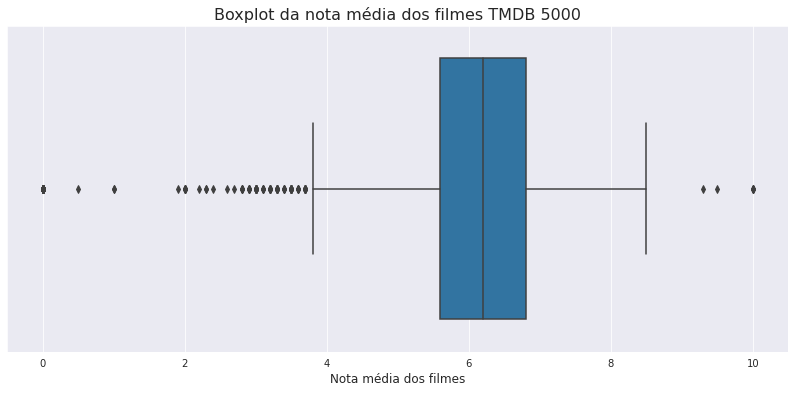

In [7]:
ax = sns.boxplot(tmdb.vote_average)
ax.set_title('Boxplot da nota média dos filmes TMDB 5000',fontsize=16)
ax.set_xlabel('Nota média dos filmes',fontsize=12)
ax.figure.set_size_inches(14,6)

Analisando o problema de filmes com nota média de 0 e 10

In [8]:
tmdb.vote_average.value_counts().sort_index()

0.0     63
0.5      1
1.0      2
1.9      1
2.0      6
        ..
8.4      2
8.5      2
9.3      1
9.5      1
10.0     4
Name: vote_average, Length: 71, dtype: int64

In [9]:
tmdb.query('vote_average == 0')

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
1464,0,"[{""id"": 18, ""name"": ""Drama""}, {""id"": 80, ""name...",NaN,310706,[],en,Black Water Transit,In this action thriller set in post-Katrina Ne...,0.126738,"[{""name"": ""Capitol Films"", ""id"": 826}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-05-13,0,100.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,NaN,Black Water Transit,0.0,0
3669,0,"[{""id"": 35, ""name"": ""Comedy""}, {""id"": 18, ""nam...",http://www.romeothemovie.com/,113406,[],en,Should've Been Romeo,"A self-centered, middle-aged pitchman for a po...",0.407030,"[{""name"": ""Phillybrook Films"", ""id"": 65147}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-04-28,0,0.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,Even Shakespeare didn't see this one coming.,Should've Been Romeo,0.0,0
3670,0,"[{""id"": 10751, ""name"": ""Family""}]",NaN,447027,[],en,Running Forever,After being estranged since her mother's death...,0.028756,"[{""name"": ""New Kingdom Pictures"", ""id"": 41671}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2015-10-27,0,88.0,[],Released,NaN,Running Forever,0.0,0
3852,0,"[{""id"": 18, ""name"": ""Drama""}]",NaN,395766,"[{""id"": 11162, ""name"": ""miniseries""}]",en,The Secret,The Secret is the story of a real-life double ...,0.042346,[],[],2016-04-29,0,200.0,[],Released,NaN,The Secret,0.0,0
3855,3500000,"[{""id"": 99, ""name"": ""Documentary""}]",http://www.timetochoose.com,370662,"[{""id"": 2210, ""name"": ""climate change""}, {""id""...",en,Time to Choose,Academy Award® winning director Charles Fergus...,1.618138,"[{""name"": ""Representational Pictures"", ""id"": 8...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2015-09-04,0,100.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,Climate change for good.,Time to Choose,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4769,0,"[{""id"": 28, ""name"": ""Action""}, {""id"": 37, ""nam...",NaN,69382,[],en,The Legend of God's Gun,A gun-slinging preacher returns to the debauch...,0.003582,[],[],2007-07-08,0,78.0,[],Released,NaN,The Legend of God's Gun,0.0,0
4771,0,"[{""id"": 27, ""name"": ""Horror""}]",NaN,220490,[],en,Her Cry: La Llorona Investigation,"Crew of ""Paranormal Legends"" went to film thei...",0.056459,[],[],2013-04-19,0,89.0,[],Released,NaN,Her Cry: La Llorona Investigation,0.0,0
4780,0,"[{""id"": 53, ""name"": ""Thriller""}, {""id"": 80, ""n...",NaN,366967,[],en,Dutch Kills,A desperate ex-con is forced to gather his old...,0.038143,[],[],2015-10-02,0,90.0,[],Released,NaN,Dutch Kills,0.0,0
4785,0,"[{""id"": 18, ""name"": ""Drama""}]",NaN,287625,[],en,Stories of Our Lives,Created by the members of a Nairobi-based arts...,0.327794,[],"[{""iso_3166_1"": ""KE"", ""name"": ""Kenya""}]",2014-09-05,0,60.0,"[{""iso_639_1"": ""sw"", ""name"": ""Kiswahili""}, {""i...",Released,NaN,Stories of Our Lives,0.0,0


Detectamos que filmes com nota média de 0 ou 10 tem poucas notas, por isso, iremos tirá-las do nosso dataset

In [10]:
tmdb_10mais = tmdb.query('vote_count >= 10')
tmdb_10mais.describe()

,budget,id,popularity,revenue,runtime,vote_average,vote_count
count,4.392000e+03,4392.000000,4392.000000,4.392000e+03,4391.000000,4392.000000,4392.000000
mean,3.164545e+07,49204.119991,23.448815,8.990969e+07,108.430881,6.226935,754.441712
std,4.162736e+07,80136.249777,32.592158,1.682870e+08,21.014719,0.893215,1272.263761
min,0.000000e+00,5.000000,0.011697,0.000000e+00,0.000000,1.900000,10.000000
25%,2.895962e+06,8403.500000,6.512166,1.365700e+04,95.000000,5.700000,83.750000
50%,1.700000e+07,13084.500000,14.827784,2.685837e+07,105.000000,6.300000,288.500000
75%,4.200000e+07,46831.250000,30.258282,1.022818e+08,118.500000,6.800000,831.000000
max,3.800000e+08,417859.000000,875.581305,2.787965e+09,338.000000,8.500000,13752.000000


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


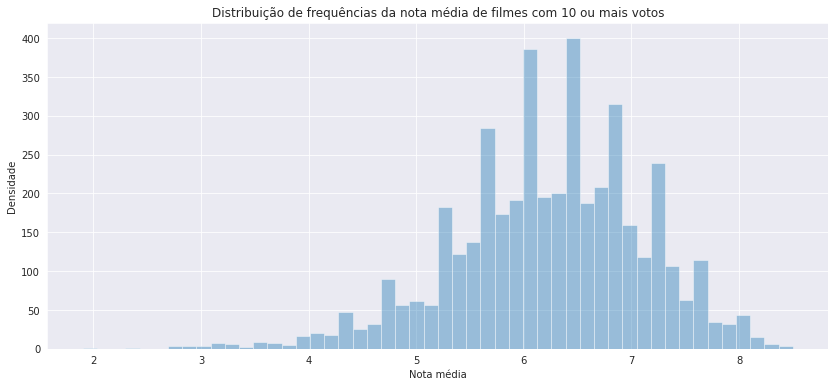

In [11]:
ax = sns.distplot(tmdb_10mais.vote_average,kde=False)
ax.set(xlabel='Nota média',ylabel='Densidade',title = 'Distribuição de frequências da nota média de filmes com 10 ou mais votos')
ax.figure.set_size_inches(14,6)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


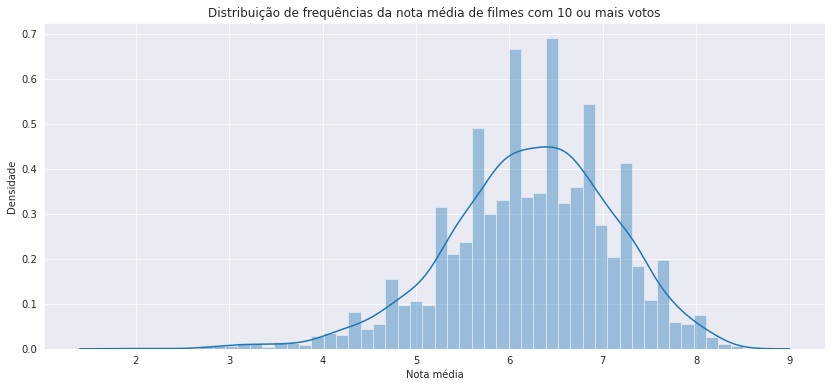

In [12]:
ax = sns.distplot(tmdb_10mais.vote_average)
ax.set(xlabel='Nota média',ylabel='Densidade',title = 'Distribuição de frequências da nota média de filmes com 10 ou mais votos')
ax.figure.set_size_inches(14,6)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


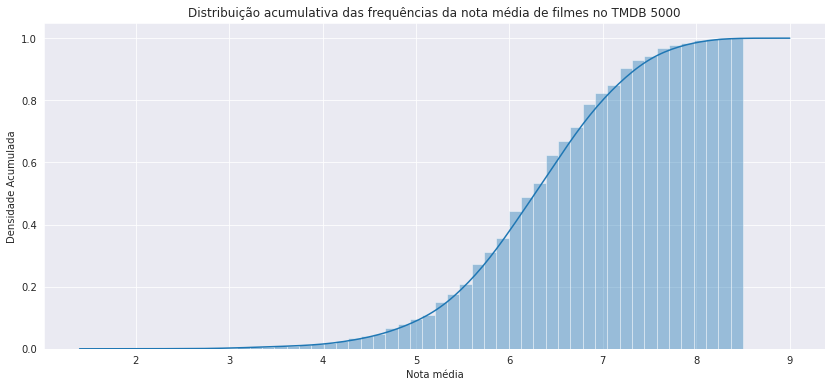

In [13]:
ax = sns.distplot(tmdb_10mais.vote_average,hist_kws={'cumulative':True},kde_kws={'cumulative':True})
ax.set(xlabel='Nota média',ylabel='Densidade Acumulada',title = 'Distribuição acumulativa das frequências da nota média de filmes no TMDB 5000')
ax.figure.set_size_inches(14,6)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


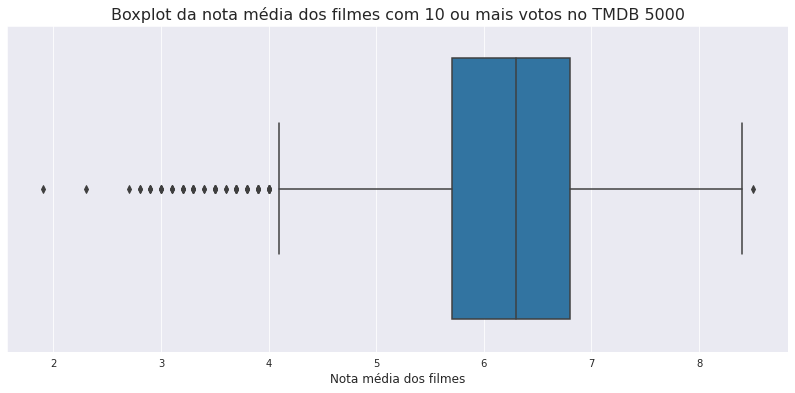

In [14]:
ax = sns.boxplot(tmdb_10mais.vote_average)
ax.set_title('Boxplot da nota média dos filmes com 10 ou mais votos no TMDB 5000',fontsize=16)
ax.set_xlabel('Nota média dos filmes',fontsize=12)
ax.figure.set_size_inches(14,6)

# Analisando o MovieLens

In [15]:
notas = pd.read_csv('ratings.csv')
notas

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931
...,...,...,...,...
100831,610,166534,4.0,1493848402
100832,610,168248,5.0,1493850091
100833,610,168250,5.0,1494273047
100834,610,168252,5.0,1493846352


In [16]:
nota_media_filme = notas.groupby('movieId')['rating'].mean()
nota_media_filme

movieId
1         3.920930
2         3.431818
3         3.259615
4         2.357143
5         3.071429
            ...   
193581    4.000000
193583    3.500000
193585    3.500000
193587    3.500000
193609    4.000000
Name: rating, Length: 9724, dtype: float64

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


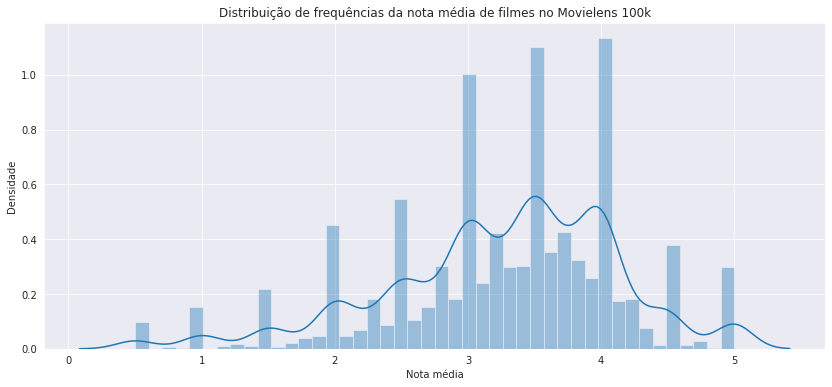

In [17]:
ax = sns.distplot(nota_media_filme)
ax.set(xlabel='Nota média',ylabel='Densidade',title = 'Distribuição de frequências da nota média de filmes no Movielens 100k')
ax.figure.set_size_inches(14,6)

In [18]:
filmes_10mais_votos = (notas['movieId'].value_counts().sort_index()>= 10).to_frame().query('movieId == True').index
filmes_10mais_votos

Int64Index([     1,      2,      3,      5,      6,      7,      9,     10,
                11,     12,
            ...
            166461, 166528, 166643, 168250, 168252, 174055, 176371, 177765,
            179819, 187593],
           dtype='int64', length=2269)

In [19]:
notas[notas['movieId'].isin(filmes_10mais_votos)]

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931
...,...,...,...,...
100818,610,159093,3.0,1493847704
100829,610,164179,5.0,1493845631
100830,610,166528,4.0,1493879365
100833,610,168250,5.0,1494273047


In [20]:
nota_media_filmes10mais = nota_media_filme.loc[filmes_10mais_votos]
nota_media_filmes10mais

1         3.920930
2         3.431818
3         3.259615
5         3.071429
6         3.946078
            ...   
174055    3.423077
176371    3.805556
177765    3.538462
179819    3.125000
187593    3.875000
Name: rating, Length: 2269, dtype: float64

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


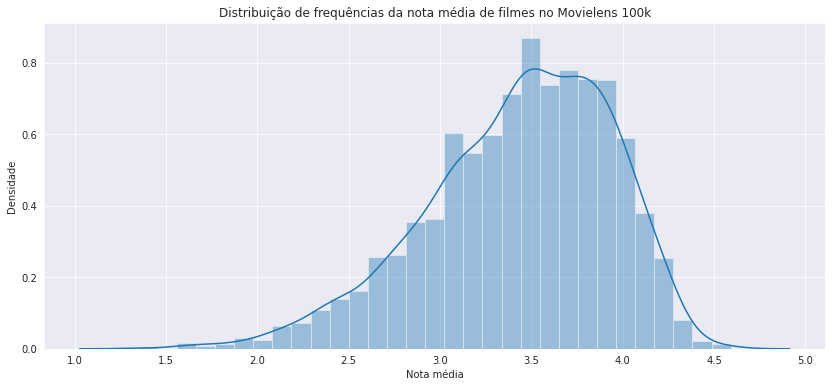

In [21]:
ax = sns.distplot(nota_media_filmes10mais)
ax.set(xlabel='Nota média',ylabel='Densidade',title = 'Distribuição de frequências da nota média de filmes no Movielens 100k')
ax.figure.set_size_inches(14,6)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


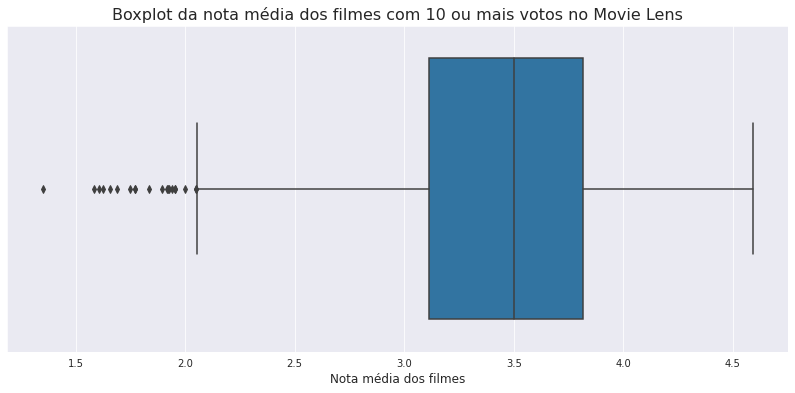

In [22]:
ax = sns.boxplot(nota_media_filmes10mais)
ax.set_title('Boxplot da nota média dos filmes com 10 ou mais votos no Movie Lens',fontsize=16)
ax.set_xlabel('Nota média dos filmes',fontsize=12)
ax.figure.set_size_inches(14,6)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


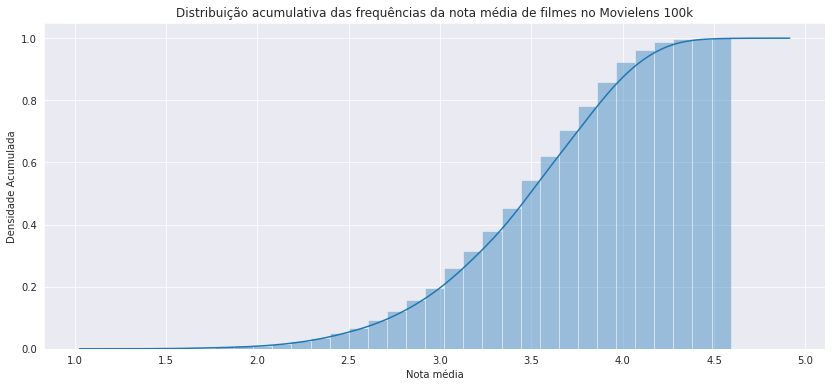

In [23]:
ax = sns.distplot(nota_media_filmes10mais,hist_kws={'cumulative':True},kde_kws={'cumulative':True})
ax.set(xlabel='Nota média',ylabel='Densidade Acumulada',title = 'Distribuição acumulativa das frequências da nota média de filmes no Movielens 100k')
ax.figure.set_size_inches(14,6)

# Analisando a distribuição dos dados capturados de outros campos TMDB

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


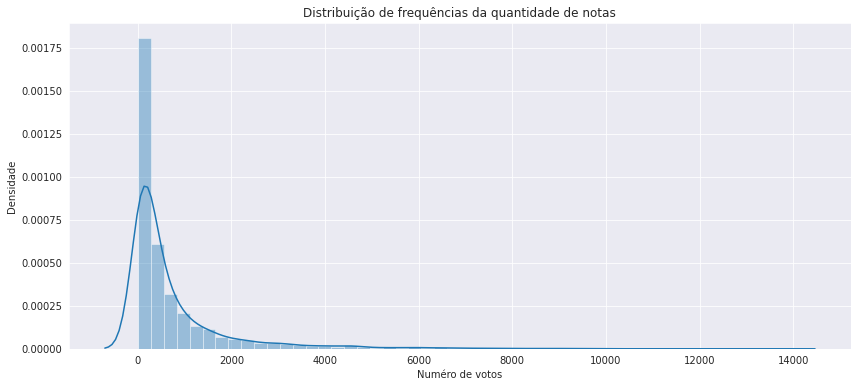

In [27]:
ax = sns.distplot(tmdb_10mais.vote_count)
ax.set(xlabel='Numéro de votos',ylabel='Densidade',title = 'Distribuição de frequências da quantidade de notas')
ax.figure.set_size_inches(14,6)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


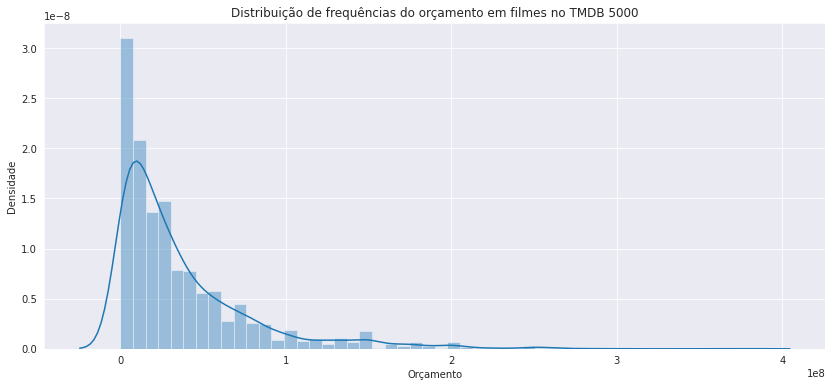

In [33]:
ax = sns.distplot(tmdb.query('budget>0').budget)
ax.set(xlabel='Orçamento',ylabel='Densidade',title = 'Distribuição de frequências do orçamento em filmes no TMDB 5000')
ax.figure.set_size_inches(14,6)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


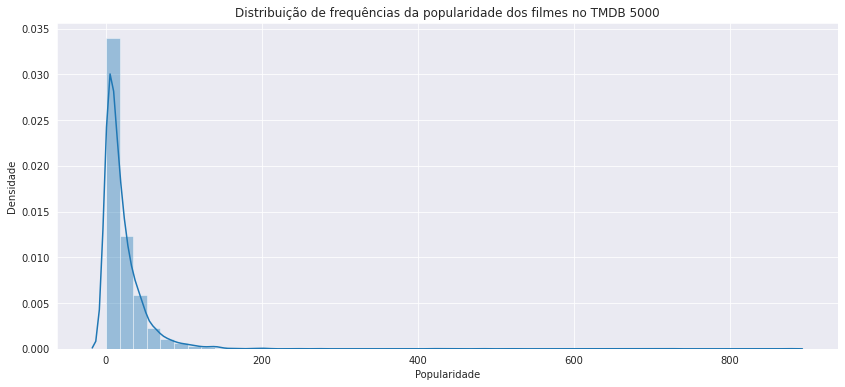

In [35]:
ax = sns.distplot(tmdb.popularity)
ax.set(xlabel='Popularidade',ylabel='Densidade',title = 'Distribuição de frequências da popularidade dos filmes no TMDB 5000')
ax.figure.set_size_inches(14,6)

In [39]:
tmdb.query('runtime > 0').runtime

1011    0.0
3112    0.0
3669    0.0
3809    0.0
3953    0.0
3992    0.0
4068    0.0
4118    0.0
4205    0.0
4210    0.0
4241    0.0
4313    0.0
4318    0.0
4322    0.0
4328    0.0
4405    0.0
4435    0.0
4458    0.0
4502    0.0
4504    0.0
4553    0.0
4558    0.0
4564    0.0
4566    0.0
4569    0.0
4571    0.0
4581    0.0
4584    0.0
4611    0.0
4620    0.0
4633    0.0
4657    0.0
4658    0.0
4662    0.0
4729    0.0
Name: runtime, dtype: float64

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


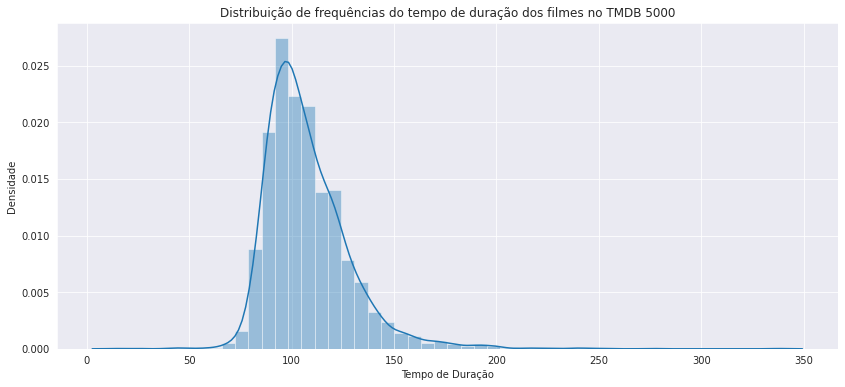

In [40]:
ax = sns.distplot(tmdb.query('runtime > 0').runtime)
ax.set(xlabel='Tempo de Duração',ylabel='Densidade',title = 'Distribuição de frequências do tempo de duração dos filmes no TMDB 5000')
ax.figure.set_size_inches(14,6)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


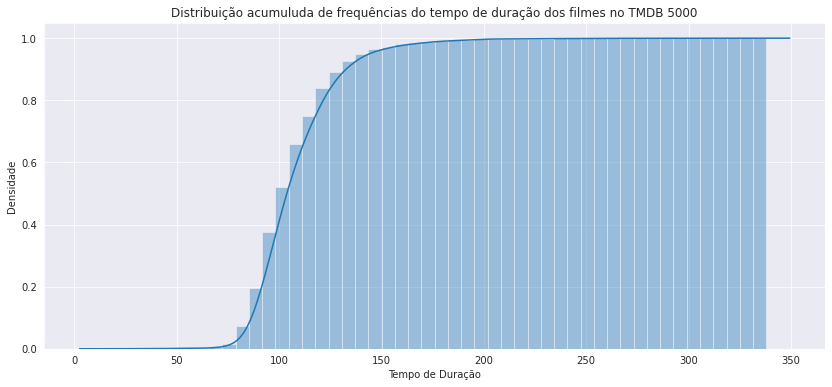

In [56]:
ax = sns.distplot(tmdb.query('runtime > 0').runtime,hist_kws={'cumulative':True},kde_kws={'cumulative':True})
ax.set(xlabel='Tempo de Duração',ylabel='Densidade',title = 'Distribuição acumuluda de frequências do tempo de duração dos filmes no TMDB 5000')
ax.figure.set_size_inches(14,6)

In [58]:
tmdb.query('runtime > 0').runtime.quantile(0.8)

121.0

# Movielens: média dos filmes com pelo menos 10 votos

In [61]:
print(f'Média da nota dos filmes com pelo menos de 10 votos: {nota_media_filmes10mais.mean()}')

Média da nota dos filmes com pelo menos de 10 votos: 3.4320503405352603


In [74]:
nota_media_filmes10mais.iloc[0:2270].mean()

3.4320503405352603

In [87]:
temp = nota_media_filmes10mais.sample(frac=1,random_state=75243)
medias = [temp.iloc[0:i].mean() for i in range(1,len(temp) + 1)]

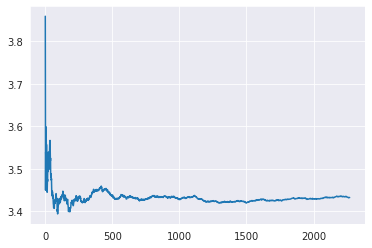

In [88]:
sns.lineplot(x = range(1,len(nota_media_filmes10mais)+1),y=medias)

In [102]:
from statsmodels.stats.weightstats import zconfint,DescrStatsW,ztest

In [90]:
zconfint(nota_media_filmes10mais)

(3.4112459477469557, 3.452854733323563)

In [92]:
describ = DescrStatsW(nota_media_filmes10mais)
describ

In [93]:
describ.tconfint_mean()

(3.411234839229381, 3.4528658418411395)

# Vamos ver o filme 1

In [94]:
filmes = pd.read_csv('movies.csv')
filmes

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy
...,...,...,...
9737,193581,Black Butler: Book of the Atlantic (2017),Action|Animation|Comedy|Fantasy
9738,193583,No Game No Life: Zero (2017),Animation|Comedy|Fantasy
9739,193585,Flint (2017),Drama
9740,193587,Bungo Stray Dogs: Dead Apple (2018),Action|Animation


In [95]:
filmes.query('movieId	 == 1')

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy


In [96]:
notas1 = notas.query('movieId == 1')
notas1

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
516,5,1,4.0,847434962
874,7,1,4.5,1106635946
1434,15,1,2.5,1510577970
1667,17,1,4.5,1305696483
...,...,...,...,...
97364,606,1,2.5,1349082950
98479,607,1,4.0,964744033
98666,608,1,2.5,1117408267
99497,609,1,3.0,847221025


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


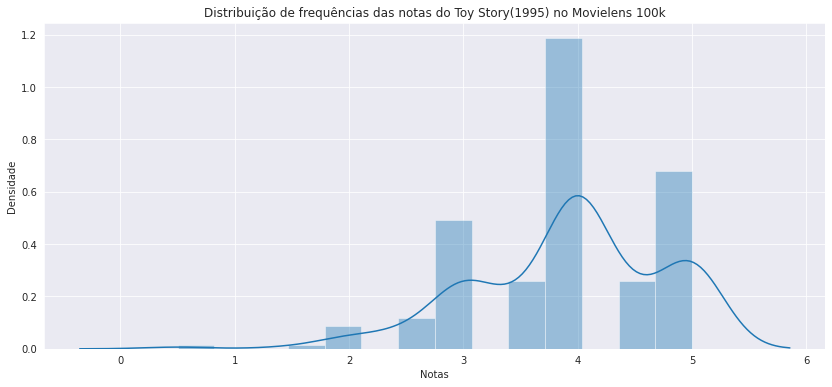

In [98]:
ax = sns.distplot(notas1['rating'])
ax.set(xlabel='Notas',ylabel='Densidade',title = 'Distribuição de frequências das notas do Toy Story(1995) no Movielens 100k')
ax.figure.set_size_inches(14,6)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


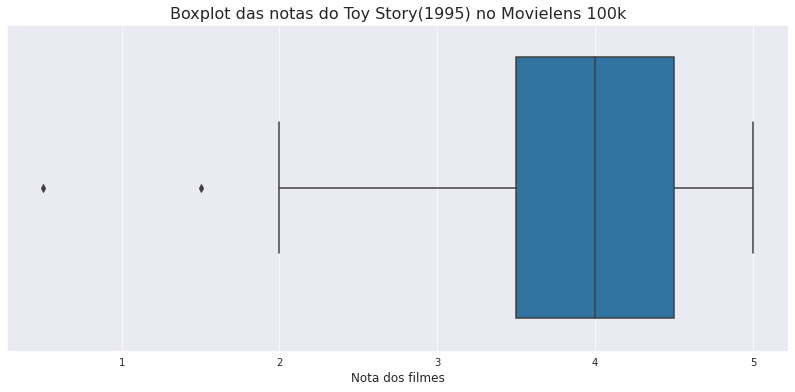

In [100]:
ax = sns.boxplot(notas1.rating)
ax.set_title('Boxplot das notas do Toy Story(1995) no Movielens 100k',fontsize=16)
ax.set_xlabel('Nota dos filmes',fontsize=12)
ax.figure.set_size_inches(14,6)

In [101]:
zconfint(notas1.rating)

(3.8093359183563402, 4.032524546759939)

In [138]:
#print(ztest(notas1.rating,nota_media_filmes10mais))
print(ztest(notas1.rating,value=3.4320503405352603))

(8.586342305916716, 8.978190401886942e-18)


In [130]:
import numpy as np
temp = notas1['rating'].sample(frac=1,random_state=75241)
medias = np.array([(i,temp.iloc[0:i].mean(),ztest(temp.iloc[0:i],value = 3.4320503405352603)[1]) for i in range(2,len(temp) + 1)])
medias

array([[2.00000000e+00, 4.50000000e+00, 3.26876211e-02],
       [3.00000000e+00, 4.00000000e+00, 3.25254351e-01],
       [4.00000000e+00, 3.87500000e+00, 2.99521970e-01],
       [5.00000000e+00, 3.90000000e+00, 1.58267818e-01],
       [6.00000000e+00, 3.91666667e+00, 7.40693646e-02],
       [7.00000000e+00, 3.92857143e+00, 3.05837219e-02],
       [8.00000000e+00, 4.06250000e+00, 8.54684682e-03],
       [9.00000000e+00, 3.94444444e+00, 3.43513698e-02],
       [1.00000000e+01, 3.60000000e+00, 6.79775744e-01],
       [1.10000000e+01, 3.59090909e+00, 6.66104056e-01],
       [1.20000000e+01, 3.50000000e+00, 8.45259443e-01],
       [1.30000000e+01, 3.50000000e+00, 8.31972270e-01],
       [1.40000000e+01, 3.53571429e+00, 7.28503654e-01],
       [1.50000000e+01, 3.60000000e+00, 5.56156495e-01],
       [1.60000000e+01, 3.56250000e+00, 6.28416636e-01],
       [1.70000000e+01, 3.64705882e+00, 4.20561961e-01],
       [1.80000000e+01, 3.72222222e+00, 2.69271809e-01],
       [1.90000000e+01, 3.68421

In [135]:
import matplotlib.pyplot as plt

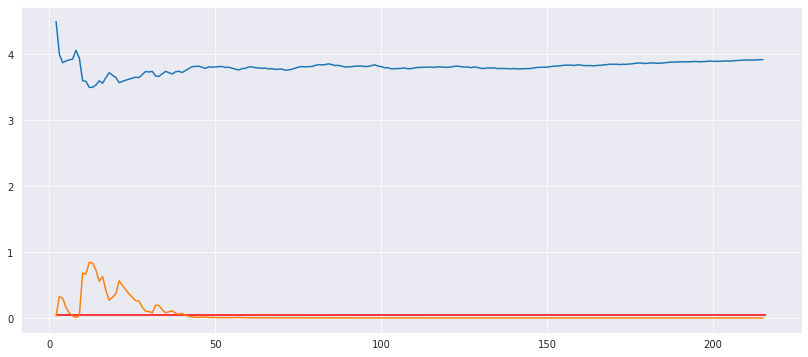

In [137]:
ax1 = sns.lineplot(x = range(2,len(temp)+1),y=medias[:,1])
ax1.figure.set_size_inches(14,6)
ax2 = sns.lineplot(x = range(2,len(temp)+1),y=medias[:,2])
plt.hlines(y = 0.05,xmin = 2,xmax = len(temp)+1,color='r')

# Comparação de dois conjuntos de amostras

In [145]:
print(ztest(notas1.rating,notas.rating))
zconfint(notas1.rating,notas.rating)

(5.894327101501841, 3.762112778881965e-09)


(0.2799245129192442, 0.5588219849631111)

In [146]:
print(ztest(notas1.rating,notas.rating))
zconfint(notas.rating,notas1.rating)

(5.894327101501841, 3.762112778881965e-09)


(-0.5588219849631111, -0.2799245129192442)

In [148]:
from scipy.stats import ttest_ind

In [150]:
ttest_ind(notas.rating,notas1.rating)

Ttest_indResult(statistic=-5.894327101501841, pvalue=3.774003138720876e-09)

In [152]:
descr_todas_notas = DescrStatsW(notas.rating)
descr_toystory = DescrStatsW(notas1.rating)
descr_todas_notas.get_compare(descr_toystory).summary()

,coef,std err,t,P>|t|,[0.025,0.975]
subset #1,-0.4194,0.071,-5.894,0.000,-0.559,-0.280


/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


Text(0.5, 1.0, 'Boxplot das notas de acordo com filme')

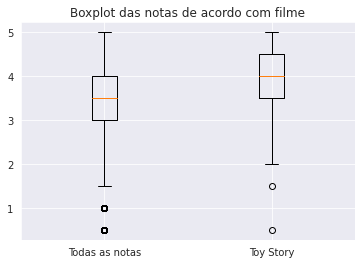

In [155]:
plt.boxplot([notas.rating,notas1.rating],labels=['Todas as notas','Toy Story'])
plt.title('Boxplot das notas de acordo com filme')

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


Text(0.5, 1.0, 'Boxplot das notas de acordo com filme')

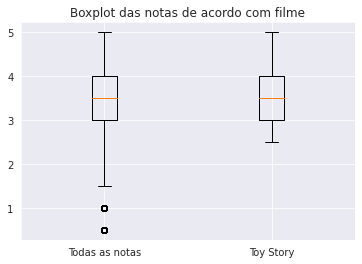

In [156]:
plt.boxplot([notas.rating,notas1[3:12].rating],labels=['Todas as notas','Toy Story'])
plt.title('Boxplot das notas de acordo com filme')

In [157]:
descr_todas_notas = DescrStatsW(notas.rating)
descr_toystory = DescrStatsW(notas1[3:12].rating)
descr_todas_notas.get_compare(descr_toystory).summary()

,coef,std err,t,P>|t|,[0.025,0.975]
subset #1,-0.0540,0.348,-0.155,0.877,-0.735,0.627


# Comparar a média de dois filmes

In [159]:
filmes.query('movieId in [1,593,72226]')

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
510,593,"Silence of the Lambs, The (1991)",Crime|Horror|Thriller
7180,72226,Fantastic Mr. Fox (2009),Adventure|Animation|Children|Comedy|Crime


/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


Text(0.5, 1.0, 'Boxplot das notas de acordo com os filme')

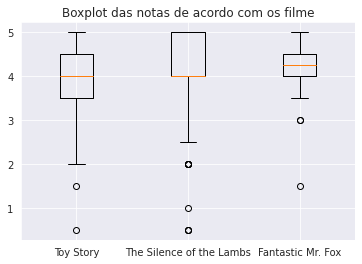

In [161]:
notas593 = notas.query('movieId == 593')
notas72226 = notas.query('movieId == 72226')
plt.boxplot([notas1.rating,notas593.rating,notas72226.rating],labels=['Toy Story','The Silence of the Lambs','Fantastic Mr. Fox'])
plt.title('Boxplot das notas de acordo com os filme')

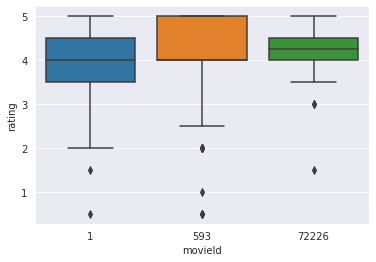

In [163]:
sns.boxplot(data = notas.query('movieId in [1,593,72226]'),x='movieId',y='rating')
sns.boxplot()

In [175]:
descr_1 = DescrStatsW(notas1.rating)
descr_593 = DescrStatsW(notas593.rating)
descr_1.get_compare(descr_593).summary(use_t=False)

,coef,std err,z,P>|z|,[0.025,0.975]
subset #1,-0.2404,0.077,-3.132,0.002,-0.391,-0.090


In [169]:
descr_72226 = DescrStatsW(notas72226.rating)
descr_593 = DescrStatsW(notas593.rating)
descr_72226.get_compare(descr_593).summary()

,coef,std err,t,P>|t|,[0.025,0.975]
subset #1,-0.0780,0.208,-0.374,0.708,-0.488,0.332


In [170]:
descr_72226.get_compare(descr_1).summary()

,coef,std err,t,P>|t|,[0.025,0.975]
subset #1,0.1624,0.206,0.788,0.431,-0.243,0.568


In [172]:
notas.query('movieId in [1,593,72226]').groupby('movieId').count()

,userId,rating,timestamp
movieId,,,
1,215,215,215
593,279,279,279
72226,18,18,18


In [179]:
from scipy.stats import normaltest,ranksums

In [178]:
_, p = normaltest(notas1.rating)
print(p)

0.00011053430732728716


In [180]:
ranksums(notas1.rating,notas593.rating)

RanksumsResult(statistic=-3.5930962013771377, pvalue=0.0003267718756440693)